In [ ]:
import tkinter as tk

from tkinter import filedialog
from tkinter import messagebox
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

file_path = None  

In [2]:
def calculate_pass_failed_percentage_from_excel(file_path, pass_mark, sheet_name='Sheet1'):

    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    
    students = df.iloc[:, 1]
    
    subject_pass_failed_percentages = {}
    

    for column in df.columns[2:]:
        
        scores = df[column]
        
        passed_count = sum(1 for score in scores if score >= pass_mark)
        pass_percentage = (passed_count / len(scores)) * 100
        
        
        failed_count = sum(1 for score in scores if score < pass_mark)
        failed_percentage = (failed_count / len(scores)) * 100
        
        subject_pass_failed_percentages[column] = {'Pass Percentage': pass_percentage, 'Failed Percentage': failed_percentage}
    
    df_pass_failed_percentage = pd.DataFrame(subject_pass_failed_percentages).T
    
    return df_pass_failed_percentage

In [3]:
def browse_excel_file():
    file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx")])
    if file_path:
        entry_var.set(file_path)

In [4]:
def plot_pass_failed_percentage():
    file_path = entry_var.get()
    pass_mark = int(pass_mark_entry.get())
    
    if file_path:
        df_pass_failed_percentage = calculate_pass_failed_percentage_from_excel(file_path, pass_mark)
        
       
        fig, ax = plt.subplots(figsize=(10, 6))
        df_pass_failed_percentage.plot(kind='bar', ax=ax)
        ax.set_xlabel('Subject')
        ax.set_ylabel('Percentage')
        ax.set_title('Pass and Failed Percentage by Subject')
        ax.legend(title='Status', bbox_to_anchor=(1, 1))
        ax.tick_params(axis='x', rotation=0)
        plt.tight_layout()
        
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        

        plot_window = tk.Toplevel(root)
        plot_window.title("Pass and Failed Percentage Plot")

        canvas = FigureCanvasTkAgg(fig, master=plot_window)
        canvas.draw()
        canvas.get_tk_widget().pack()
        

In [5]:
        
def display_student_result(student_name):
    global file_path
    file_path = entry_var.get()
    student_name = student_name.get()
    if file_path:
        
        df = pd.read_excel(file_path)

       
        student_row = df[df.iloc[:, 1] == student_name]

        if not student_row.empty:
           
            scores = student_row.iloc[:, 2:]

           
            subject_marks = scores.mean()

            
            overall_percentage = (scores.sum().sum() / 500) * 100

           
            result_window = tk.Toplevel(root)
            result_window.title(f"Result for {student_name}")

          
            result_text = tk.Text(result_window, height=10, width=50)
            result_text.pack(pady=10)

            result_text.insert(tk.END, f"Result for {student_name}:\n")
            for subject, score in zip(scores.columns, scores.values.flatten()):
                result_text.insert(tk.END, f"{subject}: {score}\n")

            result_text.insert(tk.END, f"\nOverall Percentage: {overall_percentage:.2f}%\n")

        else:
            tk.messagebox.showerror("Error", "Student not found.")

    else:
        tk.messagebox.showerror("Error", "Please select an Excel file first.")
        


In [6]:
def display_top_subject_toppers():
    global file_path
    file_path = entry_var.get()
    
    if file_path:
        
        df = pd.read_excel(file_path)

        score_columns = df.columns[2:]

        top_subject_toppers = {}  


        for subject in score_columns:
           
            df_sorted = df.sort_values(by=subject, ascending=False)

            top_students = df_sorted.head(5)
            
            top_subject_toppers[subject] = top_students

        result_window = tk.Toplevel(root)
        result_window.title("Top 5 Subject Toppers")

        
        result_text = tk.Text(result_window, height=50, width=300)
        result_text.pack(pady=10)

        
        result_text.insert(tk.END, "Top 5 Subject Toppers:\n\n")
        result_text.insert(tk.END, "Subject\tStudent Name\tScore\n")
        result_text.insert(tk.END, "--------------------------------------------------\n")

        
        for subject, toppers in top_subject_toppers.items():
            result_text.insert(tk.END, f"{subject}:\n")
            for index, row in toppers.iterrows():
                student_name = row['STUDENT NAME']
                score = row[subject]
                result_text.insert(tk.END, f"\t{student_name}\t{score}\n")
            result_text.insert(tk.END, "\n")

    else:
        tk.messagebox.showerror("Error", "Please select an Excel file first.")


In [7]:
def display_top_students():
    global file_path
    file_path = entry_var.get()
    
    if file_path:
        
        df = pd.read_excel(file_path)

       
        df['Total Score'] = df.iloc[:, 2:].sum(axis=1)

        
        df_sorted = df.sort_values(by='Total Score', ascending=False)

       
        top_10_students = df_sorted.iloc[:10]

        
        result_window = tk.Toplevel(root)
        result_window.title("Top 10 Students")

     
        result_text = tk.Text(result_window, height=50, width=300)
        result_text.pack(pady=10)


        
        result_text.insert(tk.END, "Top 10 Students:\n\n")
        result_text.insert(tk.END, "Student Name\tTotal Score\tOverall Percentage\tsubjectwise marks\n")
        result_text.insert(tk.END, "----------------------------------------------------------------------------------------------\n")

        
        for index, row in top_10_students.iterrows():
            student_name = row.iloc[1]
            total_score = row['Total Score']
            overall_percentage = (total_score / 500) * 100  # Assuming there are 5 subjects

           
            result_text.insert(tk.END, f"{student_name}\t\t{total_score}\t\t{overall_percentage:.2f}%\t\t")

           
            subject_marks = '\t'.join([f"{subject}: {score}" for subject, score in zip(df.columns[2:], row[2:])])
            result_text.insert(tk.END, subject_marks + "\n")

    else:
        tk.messagebox.showerror("Error", "Please select an Excel file first.")


In [8]:
def display_top_students():
    global file_path
    file_path = entry_var.get()
    
    if file_path:
        
        df = pd.read_excel(file_path)

       
        df['Total Score'] = df.iloc[:, 2:].sum(axis=1)

        
        df_sorted = df.sort_values(by='Total Score', ascending=False)

       
        top_10_students = df_sorted.iloc[:10]

        
        result_window = tk.Toplevel(root)
        result_window.title("Top 10 Students")

     
        result_text = tk.Text(result_window, height=50, width=300)
        result_text.pack(pady=10)


        
        result_text.insert(tk.END, "Top 10 Students:\n\n")
        result_text.insert(tk.END, "Student Name\tTotal Score\tOverall Percentage\tsubjectwise marks\n")
        result_text.insert(tk.END, "----------------------------------------------------------------------------------------------\n")

        
        for index, row in top_10_students.iterrows():
            student_name = row.iloc[1]
            total_score = row['Total Score']
            overall_percentage = (total_score / 500) * 100  # Assuming there are 5 subjects

           
            result_text.insert(tk.END, f"{student_name}\t\t{total_score}\t\t{overall_percentage:.2f}%\t\t")

           
            subject_marks = '\t'.join([f"{subject}: {score}" for subject, score in zip(df.columns[2:], row[2:])])
            result_text.insert(tk.END, subject_marks + "\n")

    else:
        tk.messagebox.showerror("Error", "Please select an Excel file first.")


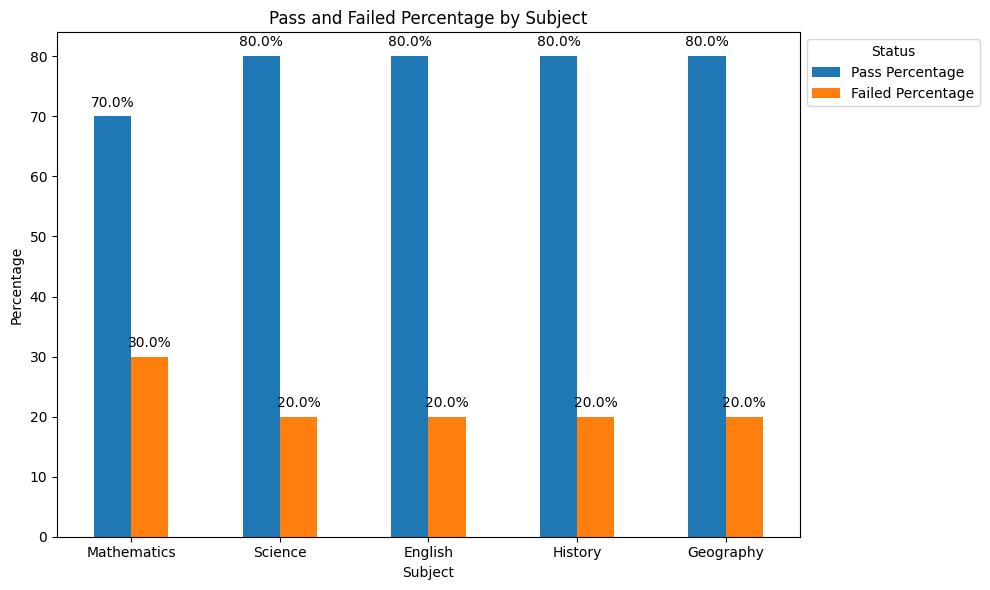

In [9]:
root = tk.Tk()
root.title("Student Result Analysis System :by G18")
root.configure(bg="BLACK") 


colour1 = "#f0f0f0"
colour2 = "#f0f0f0"
colour3 = "#f0f0f0"
colour4 = "BLACK"


button_style = {
    "background": colour2,
    "foreground": colour4,
    "activebackground": colour2,
    "activeforeground": colour4,
    "highlightthickness": 2,
    "highlightbackground": colour2,
    "width": 12,
    
    "cursor": "hand2",
    "font": ("Arial", 10)
}
button_style2 = {
    "background": colour2,
    "foreground": colour4,
    "activebackground": colour3,
    "activeforeground": colour4,
    "highlightthickness": 2,
    "highlightbackground": colour2,
    "highlightbackground":"WHITE",
    "highlightcolor":"WHITE",
    "width": 20,
   
    "cursor": "hand2",
    "font": ("Arial", 10)
}
label_style = {
    "background": "#f0f0f0",
    "foreground": "black",
    "width": 20,
    "bd":2,
    "highlightbackground":"WHITE",
    "highlightcolor":"WHITE",

    "cursor": "hand2",
    "font": ("Arial", 10)
}

entry_style = {
    "background": "#f0f0f0",
    "foreground": "black",
    "width": 30,
    
    "cursor": "hand2",
    "font": ("Arial", 10)
}

tk.Label(root, text="Select Excel File:",**label_style).grid(row=0, column=0, padx=5, pady=5)
entry_var = tk.StringVar()
file_entry = tk.Entry(root, textvariable=entry_var, **entry_style)
file_entry.grid(row=0, column=1, padx=5, pady=5)
browse_button = tk.Button(root, text="Browse", command=browse_excel_file,**button_style)
browse_button.grid(row=0, column=2, padx=5, pady=5)

tk.Label(root, text="Enter Pass Mark:",**label_style).grid(row=1, column=0, padx=5, pady=5)
pass_mark_entry = tk.Entry(root,**entry_style)
pass_mark_entry.grid(row=1, column=1, padx=5, pady=5)

plot_button = tk.Button(root, text="Plot Pass and \nFailed Percentage", command=lambda : plot_pass_failed_percentage(),**button_style)
plot_button.grid(row=1, column=2, padx=5, pady=5)


tk.Label(root, text="Display student result:",**label_style).grid(row=3, column=0, padx=5, pady=5)
student_name = tk.StringVar()
name_entry = tk.Entry(root, textvariable=student_name,**entry_style)
name_entry.grid(row=3, column=1, padx=5, pady=5)
name_button = tk.Button(root, text="Show result", command=lambda: display_student_result(student_name),**button_style)
name_button.grid(row=3, column=2, padx=5, pady=5)

top10_button = tk.Button(root, text="Top 10 students", command=display_top_students,**button_style2)
top10_button.grid(row=4, column=0, padx=5, pady=5)

top5_subject_toppers_button = tk.Button(root, text="Top 5 Subject Toppers", command=display_top_subject_toppers,**button_style2)
top5_subject_toppers_button.grid(row=4, column=1, padx=5, pady=5)



root.mainloop()
